In [1]:
import numpy as np
from typing import *
import matplotlib.pyplot as plt
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/nghiatnh/Study/Sem5/AIL302m/Projects/AIL302m-Machine_Learning/')
from Modules.classification.multi_layer_perceptron import MultilayerPerceptron

In [2]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((d0, N*C)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
  y[ix] = j


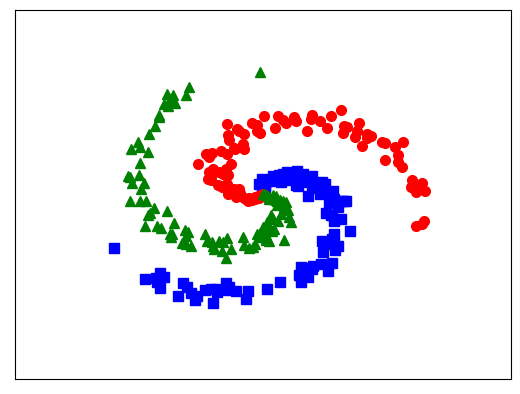

In [3]:
# lets visualize the data:

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7);
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7);
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize = 7);
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.show()


In [4]:
from sklearn.model_selection import train_test_split
x_t, x_test, y_t, y_test = train_test_split(X.T, y.T, shuffle=True, test_size=0.2)
print(x_t.shape)
print(y_t.shape)

(240, 2)
(240,)


In [5]:
clf = MultilayerPerceptron(max_iter=10000, batch_size=50, verbose=True,learning_rate=0.001, tol=1e-4,solver='adam', n_iter_check_loss=10)
clf.fit(x_t, y_t)

Epoch 10:	|███████████████████████████████████████████████████|	100%
Epoch 10,	train loss: 1.6576531813528546
Epoch 20:	|███████████████████████████████████████████████████|	100%
Epoch 20,	train loss: 1.1980773948625765
Epoch 30:	|███████████████████████████████████████████████████|	100%
Epoch 30,	train loss: 0.9529296076212156
Epoch 40:	|███████████████████████████████████████████████████|	100%
Epoch 40,	train loss: 0.7992744565768175
Epoch 50:	|███████████████████████████████████████████████████|	100%
Epoch 50,	train loss: 0.6933769575265375
Epoch 60:	|███████████████████████████████████████████████████|	100%
Epoch 60,	train loss: 0.6132819699138071
Epoch 70:	|███████████████████████████████████████████████████|	100%
Epoch 70,	train loss: 0.5497021868350488
Epoch 80:	|███████████████████████████████████████████████████|	100%
Epoch 80,	train loss: 0.4978298845872223
Epoch 90:	|███████████████████████████████████████████████████|	100%
Epoch 90,	train loss: 0.4565610809144638
Epoch 100:

train accuracy: 100.0%
test accuracy: 96.66666666666667%


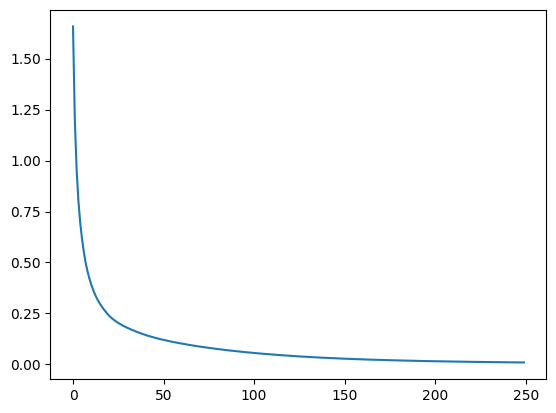

In [6]:
print("train accuracy: {}%".format(clf.score(x_t, y_t) * 100))
print("test accuracy: {}%".format(clf.score(x_test, y_test) * 100))
plt.plot(clf.loss_curve_)

In [7]:
from sklearn.neural_network import MLPClassifier
clf1 = MLPClassifier(max_iter=100000, batch_size=50, verbose=True, solver='adam',tol=1e-4, early_stopping=False)
clf1.fit(x_t, y_t)

Iteration 1, loss = 1.15559656
Iteration 2, loss = 1.13764549
Iteration 3, loss = 1.12122598
Iteration 4, loss = 1.10462923
Iteration 5, loss = 1.08940067
Iteration 6, loss = 1.07437669
Iteration 7, loss = 1.05995635
Iteration 8, loss = 1.04505579
Iteration 9, loss = 1.03193570
Iteration 10, loss = 1.01776134
Iteration 11, loss = 1.00439738
Iteration 12, loss = 0.99102411
Iteration 13, loss = 0.97784273
Iteration 14, loss = 0.96542223
Iteration 15, loss = 0.95218462
Iteration 16, loss = 0.94021294
Iteration 17, loss = 0.92805753
Iteration 18, loss = 0.91672358
Iteration 19, loss = 0.90507057
Iteration 20, loss = 0.89345168
Iteration 21, loss = 0.88286458
Iteration 22, loss = 0.87273753
Iteration 23, loss = 0.86272494
Iteration 24, loss = 0.85318670
Iteration 25, loss = 0.84399678
Iteration 26, loss = 0.83527637
Iteration 27, loss = 0.82703615
Iteration 28, loss = 0.81937447
Iteration 29, loss = 0.81165044
Iteration 30, loss = 0.80498376
Iteration 31, loss = 0.79781904
Iteration 32, los

MLPClassifier(batch_size=50, max_iter=100000, verbose=True)

train accuracy: 100.0%
test accuracy: 96.66666666666667%


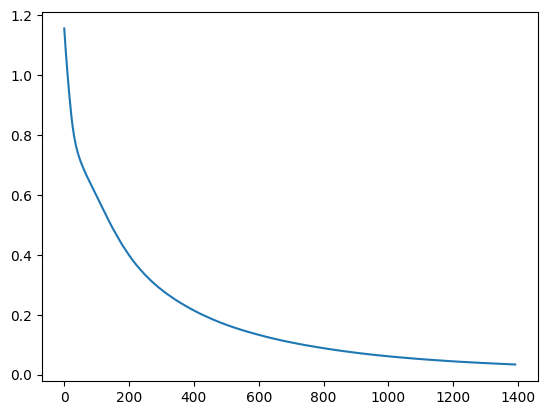

In [8]:
print("train accuracy: {}%".format(clf1.score(x_t, y_t) * 100))
print("test accuracy: {}%".format(clf1.score(x_test, y_test) * 100))
plt.plot(clf1.loss_curve_)

In [14]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=100, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = MultilayerPerceptron(max_iter=3000)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

Epoch 10:	|███████████████████████████████████████████████████|	100%
Epoch 10,	train loss: 27.49929807488108
Epoch 20:	|███████████████████████████████████████████████████|	100%
Epoch 20,	train loss: 24.256441873648455
Epoch 30:	|███████████████████████████████████████████████████|	100%
Epoch 30,	train loss: 21.153519530791737
Epoch 40:	|███████████████████████████████████████████████████|	100%
Epoch 40,	train loss: 18.297151970161007
Epoch 50:	|███████████████████████████████████████████████████|	100%
Epoch 50,	train loss: 15.703242363034953
Epoch 60:	|███████████████████████████████████████████████████|	100%
Epoch 60,	train loss: 13.40542596588699
Epoch 70:	|███████████████████████████████████████████████████|	100%
Epoch 70,	train loss: 11.552834776896377
Epoch 80:	|███████████████████████████████████████████████████|	100%
Epoch 80,	train loss: 9.932406403123371
Epoch 90:	|███████████████████████████████████████████████████|	100%
Epoch 90,	train loss: 8.413069636743717
Epoch 100:	|██

0.8